# COS 598 Image Processing Spring 2022 HW2 Gaussian Blur in SimpleITK

### By: Nicholas Soucy

## Imports

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt


print(sitk.Version())

SimpleITK Version: 2.1.1 (ITK 5.2)
Compiled: Sep  8 2021 19:40:35



## Setup Background Image and Image Functions 

Create normalization function for SimpleITK images

In [2]:
def normalize(img):
    max_value = 0
    for x in range(256):
        for y in range(256):
            if img[x,y] > max_value:
                max_value = img[x,y]
    for x in range(256):
        for y in range(256):
            img[x,y] = img[x,y]/max_value
    return img

Show Mona Lisa Background Image without Gaussian Blur

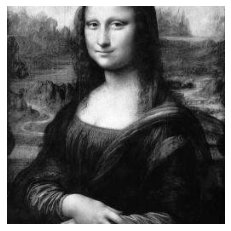

In [3]:
# Retrieve an image from the network, read it and display using the external viewer
mona_itk = sitk.ReadImage('mona_gray.jpeg', sitk.sitkFloat64)
mona_itk = normalize(mona_itk)


plt.imshow(sitk.GetArrayViewFromImage(mona_itk), cmap=plt.cm.Greys_r)
plt.axis('off');

## Define Guassian Function 

Define Gaussian function to calcuate the guassian and apply it to background

In [4]:
def Cal_Gaussian(a,b,sig_x,sig_y,x_0,y_0,theta):
    #define gaussian image with background
    row,col=b.GetWidth(),b.GetHeight()
    gauss=sitk.Image((row, col), sitk.sitkFloat64)
    
    #define all matrices for gaussian calculation
    epsilon = np.array([[sig_x**2, 0], [0,sig_y**2]])
    epsilon_invert = np.linalg.inv(epsilon)
    R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta),np.cos(theta)]])
    mu = np.array([x_0,y_0])
    
    #calculate gaussian for each pixel and apply to each pixel in background
    for x in range(row):
        for y in range(col):
            x_bar = np.array([x,y])
            
            frac = (1/(2*np.pi*np.sqrt(np.linalg.det(epsilon))))
            
            expo = np.exp(-(((x_bar-mu) @ R @ np.linalg.inv(epsilon) @ R.T @ (x_bar-mu).T)/2.0))
            
            gauss[x,y] = (a * (frac * expo)) + b[x,y]

    
    #renormalize the new picture for relative contrast
    gauss = normalize(gauss)
    return(gauss)

## Image A)  Sigma_x = Sigma_y = 20 and Theta = 0

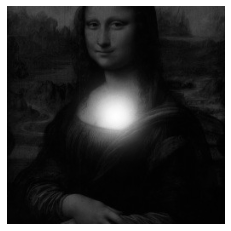

In [5]:
gau = Cal_Gaussian(7000,mona_itk,20,20,128,128,0)
plt.imshow(sitk.GetArrayViewFromImage(gau), cmap=plt.cm.Greys_r)
plt.axis('off');

## Image B)  Sigma_x = 5, Sigma_y = 20 and Theta = pi/4

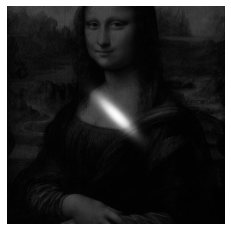

In [6]:
gau = Cal_Gaussian(2000,mona_itk,5,20,128,128,(np.pi/4))
plt.imshow(sitk.GetArrayViewFromImage(gau), cmap=plt.cm.Greys_r)
plt.axis('off');

## Image C)  Sigma_x = 10, Sigma_y = 30 and Theta = -pi/6

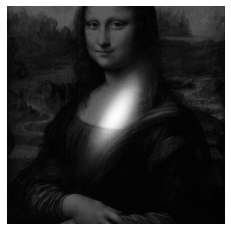

In [7]:
gau = Cal_Gaussian(4000,mona_itk,10,30,128,128,-(np.pi/6))
plt.imshow(sitk.GetArrayViewFromImage(gau), cmap=plt.cm.Greys_r)
plt.axis('off');